# Consumption Of Alcohol

In [ ]:
import sqlite3

conn = sqlite3.connect('normalized_database.db')
cursor = conn.cursor()

sql_script = """
-- Create Regions Table
CREATE TABLE IF NOT EXISTS Regions (
    RegionID INTEGER PRIMARY KEY AUTOINCREMENT,
    RegionName TEXT UNIQUE NOT NULL
);

-- Create Years Table
CREATE TABLE IF NOT EXISTS Years (
    YearID INTEGER PRIMARY KEY AUTOINCREMENT,
    Year INTEGER UNIQUE NOT NULL
);

-- Create AlcoholTypes Table
CREATE TABLE IF NOT EXISTS AlcoholTypes (
    AlcoholTypeID INTEGER PRIMARY KEY AUTOINCREMENT,
    AlcoholType TEXT UNIQUE NOT NULL
);

-- Create Consumption Table
CREATE TABLE IF NOT EXISTS Consumption (
    ConsumptionID INTEGER PRIMARY KEY AUTOINCREMENT,
    RegionID INTEGER NOT NULL,
    YearID INTEGER NOT NULL,
    AlcoholTypeID INTEGER NOT NULL,
    TotalConsumption REAL,
    PerCapitaConsumption REAL,
    PureAlcoholPerCapita REAL,
    FOREIGN KEY (RegionID) REFERENCES Regions(RegionID),
    FOREIGN KEY (YearID) REFERENCES Years(YearID),
    FOREIGN KEY (AlcoholTypeID) REFERENCES AlcoholTypes(AlcoholTypeID)
);
"""
cursor.executescript(sql_script)
conn.commit()

insert_script = """
INSERT OR IGNORE INTO Regions (RegionName) VALUES
('Belgorod Oblast'),
('Bryansk Oblast'),
('Vladimir Oblast');

INSERT OR IGNORE INTO Years (Year) VALUES
(2017),
(2018),
(2019);

INSERT OR IGNORE INTO AlcoholTypes (AlcoholType) VALUES
('Wine'),
('Beer'),
('Spirits');

INSERT OR IGNORE INTO Consumption (RegionID, YearID, AlcoholTypeID, TotalConsumption, PerCapitaConsumption, PureAlcoholPerCapita) VALUES
(1, 1, 1, 278.27, 1.79, 0.20),
(2, 1, 1, 368.22, 3.02, 0.33),
(3, 1, 1, 518.43, 3.70, 0.41);
"""
cursor.executescript(insert_script)
conn.commit()

query = """
SELECT 
    Regions.RegionName,
    Years.Year,
    AlcoholTypes.AlcoholType,
    Consumption.TotalConsumption,
    Consumption.PerCapitaConsumption,
    Consumption.PureAlcoholPerCapita
FROM 
    Consumption
JOIN 
    Regions ON Consumption.RegionID = Regions.RegionID
JOIN 
    Years ON Consumption.YearID = Years.YearID
JOIN 
    AlcoholTypes ON Consumption.AlcoholTypeID = AlcoholTypes.AlcoholTypeID;
"""

cursor.execute(query)
results = cursor.fetchall()

print("RegionName | Year | AlcoholType | TotalConsumption | PerCapitaConsumption | PureAlcoholPerCapita")
print("-" * 80)
for row in results:
    print(" | ".join(map(str, row)))

conn.close()


In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('normalized_database.db')

query = """
SELECT 
    Regions.RegionName,
    Years.Year,
    AlcoholTypes.AlcoholType,
    Consumption.TotalConsumption,
    Consumption.PerCapitaConsumption,
    Consumption.PureAlcoholPerCapita
FROM 
    Consumption
JOIN 
    Regions ON Consumption.RegionID = Regions.RegionID
JOIN 
    Years ON Consumption.YearID = Years.YearID
JOIN 
    AlcoholTypes ON Consumption.AlcoholTypeID = AlcoholTypes.AlcoholTypeID;
"""

df = pd.read_sql_query(query, conn)

print(df)

conn.close()


        RegionName  Year AlcoholType  TotalConsumption  PerCapitaConsumption  \
0  Belgorod Oblast  2017        Wine            278.27                  1.79   
1   Bryansk Oblast  2017        Wine            368.22                  3.02   
2  Vladimir Oblast  2017        Wine            518.43                  3.70   
3  Belgorod Oblast  2017        Wine            278.27                  1.79   
4   Bryansk Oblast  2017        Wine            368.22                  3.02   
5  Vladimir Oblast  2017        Wine            518.43                  3.70   

   PureAlcoholPerCapita  
0                  0.20  
1                  0.33  
2                  0.41  
3                  0.20  
4                  0.33  
5                  0.41  


In [7]:

conn = sqlite3.connect('normalized_database.db')
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:", tables)

conn.close()


Tables in the database: [('Regions',), ('sqlite_sequence',), ('Years',), ('AlcoholTypes',), ('Consumption',)]


In [6]:
conn = sqlite3.connect('normalized_database.db')
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tables in the database:", cursor.fetchall())
conn.close()


Tables in the database: [('Regions',), ('sqlite_sequence',), ('Years',), ('AlcoholTypes',), ('Consumption',)]


In [7]:
conn = sqlite3.connect('normalized_database.db')
cursor = conn.cursor()
cursor.execute("SELECT * FROM Consumption LIMIT 5;")
print(cursor.fetchall())
conn.close()


[(1, 1, 1, 1, 278.27, 1.79, 0.2), (2, 2, 1, 1, 368.22, 3.02, 0.33), (3, 3, 1, 1, 518.43, 3.7, 0.41)]


In [12]:
%pip install scikit-learn


In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer



In [15]:
%pip install mlflow


   ---------------------------------------- 0.0/27.4 MB ? eta -:--:--
   ----------- ---------------------------- 7.6/27.4 MB 40.5 MB/s eta 0:00:01
   ------------------------ --------------- 16.8/27.4 MB 42.0 MB/s eta 0:00:01
   ------------------------------------- -- 25.4/27.4 MB 42.2 MB/s eta 0:00:01
   ---------------------------------------- 27.4/27.4 MB 38.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.9 MB ? eta -:--:--
   ---------------------------------------- 5.9/5.9 MB 39.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 8.0/8.0 MB 39.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/25.1 MB ? eta -:--:--
   -------------- ------------------------- 8.9/25.1 MB 43.4 MB/s eta 0:00:01
   ---------------------------- ----------- 17.6/25.1 MB 43.3 MB/s eta 0:00:01
   ---------------------------------------  24.9/25.1 MB 43.3 MB/s eta 0:00:01
   --------------

In [19]:
import mlflow
    

In [21]:
%pip install dagshub


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ------------- -------------------------- 4.5/13.3 MB 21.8 MB/s eta 0:00:01
   -------------------------- ------------- 8.7/13.3 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 23.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 37.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   ---------------------------------------- 3.8/3.8 MB 38.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
from dagshub import DAGsHubLogger


In [10]:

import dagshub
dagshub.init(repo_owner='durgaprasadsakala2003', repo_name='my-first-repo', mlflow=True)

Accessing as durgaprasadsakala2003

Initialized MLflow to track repo "durgaprasadsakala2003/my-first-repo"

Repository durgaprasadsakala2003/my-first-repo initialized!

In [12]:
import os
import mlflow
from dagshub import DAGsHubLogger
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix, make_scorer

os.environ["GIT_PYTHON_REFRESH"] = "quiet"

mlflow.set_tracking_uri("https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow")

logger = DAGsHubLogger(metrics_path="metrics.json", hparams_path="hparams.json")

X = pd.DataFrame({
    "numeric_feature_1": np.random.rand(100),
    "numeric_feature_2": np.random.rand(100),
    "categorical_feature": np.random.choice(["A", "B", "C"], size=100),
})
y = np.random.choice([0, 1], size=100)

numeric_features = ["numeric_feature_1", "numeric_feature_2"]
categorical_features = ["categorical_feature"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("minmax", MinMaxScaler()),
    ("log_transform", FunctionTransformer(np.log1p, validate=True))
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score)

with mlflow.start_run():
   
    mlflow.log_param("model", "Logistic Regression with Preprocessing")
    mlflow.log_param("preprocessing", "StandardScaler, MinMaxScaler, LogTransformation, OneHotEncoding")
    mlflow.log_param("cv_splits", 10)
    
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring=f1_scorer)
    mean_f1 = np.mean(scores)
    std_f1 = np.std(scores)
    
    # Log CV metrics
    mlflow.log_metric("mean_f1_score", mean_f1)
    mlflow.log_metric("std_f1_score", std_f1)
    
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)
    
    param_grid = {
        "classifier__C": [0.1, 1, 10],
        "classifier__penalty": ["l2"],
        "classifier__solver": ["liblinear", "saga"]
    }
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring=f1_scorer, n_jobs=-1)
    grid_search.fit(X, y)
    
    mlflow.log_param("best_params", grid_search.best_params_)
    mlflow.log_metric("best_f1_score", grid_search.best_score_)

    print(f"Mean F1-Score (CV): {mean_f1:.4f} ± {std_f1:.4f}")
    print(f"Best F1-Score (Tuned): {grid_search.best_score_:.4f}")
    print("Confusion Matrix:", {"TP": tp, "TN": tn, "FP": fp, "FN": fn})


Mean F1-Score (CV): 0.5813 ± 0.1120
Best F1-Score (Tuned): 0.6301
Confusion Matrix: {'TP': np.int64(36), 'TN': np.int64(19), 'FP': np.int64(29), 'FN': np.int64(16)}
🏃 View run mysterious-fly-456 at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/f0d48a19eb5043ee8805730ab6073fe4
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0


In [13]:
import os
import mlflow
from dagshub import DAGsHubLogger
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, make_scorer

os.environ["GIT_PYTHON_REFRESH"] = "quiet"

mlflow.set_tracking_uri("https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow")

logger = DAGsHubLogger(metrics_path="metrics.json", hparams_path="hparams.json")

X = pd.DataFrame({
    "numeric_feature_1": np.random.rand(100),
    "numeric_feature_2": np.random.rand(100),
    "categorical_feature": np.random.choice(["A", "B", "C"], size=100),
})
y = np.random.choice([0, 1], size=100)

numeric_features = ["numeric_feature_1", "numeric_feature_2"]
categorical_features = ["categorical_feature"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("minmax", MinMaxScaler()),
    ("log_transform", FunctionTransformer(np.log1p, validate=True))
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RidgeClassifier": RidgeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score)

for classifier_name, classifier in classifiers.items():

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])
    

    with mlflow.start_run(run_name=classifier_name):
    
        mlflow.log_param("model", classifier_name)
        mlflow.log_param("preprocessing", "StandardScaler, MinMaxScaler, LogTransformation, OneHotEncoding")
        mlflow.log_param("cv_splits", 10)
    
        scores = cross_val_score(pipeline, X, y, cv=cv, scoring=f1_scorer)
        mean_f1 = np.mean(scores)
        std_f1 = np.std(scores)
        
        
        mlflow.log_metric("mean_f1_score", mean_f1)
        mlflow.log_metric("std_f1_score", std_f1)
        
        pipeline.fit(X, y)
        y_pred = pipeline.predict(X)
        
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        mlflow.log_metric("TP", tp)
        mlflow.log_metric("TN", tn)
        mlflow.log_metric("FP", fp)
        mlflow.log_metric("FN", fn)
        
        if hasattr(classifier, "get_params"):
            mlflow.log_params(classifier.get_params())
        
        print(f"Classifier: {classifier_name}")
        print(f"Mean F1-Score (CV): {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


Classifier: LogisticRegression
Mean F1-Score (CV): 0.6662 ± 0.0737
Confusion Matrix: TP=38, TN=26, FP=22, FN=14
🏃 View run LogisticRegression at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/b6785274eefe414c8c492ba80f8065f3
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0
Classifier: RidgeClassifier
Mean F1-Score (CV): 0.6114 ± 0.1467
Confusion Matrix: TP=37, TN=28, FP=20, FN=15
🏃 View run RidgeClassifier at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/85673227717c483bbb5afca5819bddd2
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0
Classifier: RandomForestClassifier
Mean F1-Score (CV): 0.5618 ± 0.1650
Confusion Matrix: TP=52, TN=48, FP=0, FN=0
🏃 View run RandomForestClassifier at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/54b4aa4521174a199d3a27d07bea9935
🧪 View ex

In [14]:
import os
import mlflow
from dagshub import DAGsHubLogger
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, make_scorer

os.environ["GIT_PYTHON_REFRESH"] = "quiet"

mlflow.set_tracking_uri("https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow")

logger = DAGsHubLogger(metrics_path="metrics.json", hparams_path="hparams.json")

X = pd.DataFrame({
    "numeric_feature_1": np.random.rand(100),
    "numeric_feature_2": np.random.rand(100),
    "categorical_feature": np.random.choice(["A", "B", "C"], size=100),
})
y = np.random.choice([0, 1], size=100)

numeric_features = ["numeric_feature_1", "numeric_feature_2"]
categorical_features = ["categorical_feature"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("minmax", MinMaxScaler()),
    ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
    ("log_transform", FunctionTransformer(np.log1p, validate=True))
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

def combine_features(df):
    df["numeric_feature_sum"] = df["numeric_feature_1"] + df["numeric_feature_2"]
    df["numeric_feature_product"] = df["numeric_feature_1"] * df["numeric_feature_2"]
    return df

X = combine_features(X)

classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

f1_scorer = make_scorer(f1_score)

for classifier_name, classifier in classifiers.items():

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])

    with mlflow.start_run(run_name=classifier_name):
       
        mlflow.log_param("model", classifier_name)
        mlflow.log_param("preprocessing", "StandardScaler, MinMaxScaler, LogTransformation, PolynomialFeatures, OneHotEncoding")
        mlflow.log_param("cv_splits", 10)
        
        scores = cross_val_score(pipeline, X, y, cv=cv, scoring=f1_scorer)
        mean_f1 = np.mean(scores)
        std_f1 = np.std(scores)
        
        mlflow.log_metric("mean_f1_score", mean_f1)
        mlflow.log_metric("std_f1_score", std_f1)
        
        pipeline.fit(X, y)
        y_pred = pipeline.predict(X)
        
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        mlflow.log_metric("TP", tp)
        mlflow.log_metric("TN", tn)
        mlflow.log_metric("FP", fp)
        mlflow.log_metric("FN", fn)
        
        if hasattr(classifier, "get_params"):
            mlflow.log_params(classifier.get_params())
        
        print(f"Classifier: {classifier_name}")
        print(f"Mean F1-Score (CV): {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


Classifier: LogisticRegression
Mean F1-Score (CV): 0.5009 ± 0.1297
Confusion Matrix: TP=30, TN=27, FP=24, FN=19
🏃 View run LogisticRegression at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/d4e68313d03042cca0eb0b905f3c4d32
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0
Classifier: RandomForestClassifier
Mean F1-Score (CV): 0.4039 ± 0.1562
Confusion Matrix: TP=49, TN=51, FP=0, FN=0
🏃 View run RandomForestClassifier at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/80604ca1e89f4a6ba5d61157d6eeff92
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0


In [15]:
import os
import mlflow
from dagshub import DAGsHubLogger
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, make_scorer

# Suppress Git warnings if Git is not installed
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

# Set MLFlow tracking URI for DagsHub
mlflow.set_tracking_uri("https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow")

# Initialize DAGsHubLogger
logger = DAGsHubLogger(metrics_path="metrics.json", hparams_path="hparams.json")

# Example dataset (replace with your actual dataset)
X = pd.DataFrame({
    "numeric_feature_1": np.random.rand(100),
    "numeric_feature_2": np.random.rand(100),
    "numeric_feature_3": np.random.rand(100),
    "categorical_feature": np.random.choice(["A", "B", "C"], size=100),
})
y = np.random.choice([0, 1], size=100)

# Feature Selection: Correlation Threshold
def select_by_correlation(df, threshold=0.8):
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    corr_matrix = numeric_df.corr().abs()  # Compute correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Upper triangle of correlation matrix
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]  # Columns to drop
    return df.drop(to_drop, axis=1)  # Return dataset without highly correlated columns

# Feature Selection: Variance Threshold
def select_by_variance(df, threshold=0.01):  # Lowered the default threshold
    selector = VarianceThreshold(threshold)
    numeric_df = df.select_dtypes(include=[np.number])  # VarianceThreshold works on numeric features only
    if numeric_df.shape[1] == 0:  # If no numeric features exist, return the original dataset
        return df
    try:
        selected_features = selector.fit(numeric_df).get_support()
        if not any(selected_features):  # If no features meet the threshold, return original numeric_df
            return numeric_df
        return df.loc[:, numeric_df.columns[selected_features]]
    except ValueError:
        # If all features fail the threshold, return the original numeric_df
        return numeric_df

# Feature Selection: Feature Importance
def select_by_feature_importance(model, X, y):
    selector = SelectFromModel(model)
    selector.fit(X, y)
    return X.loc[:, selector.get_support()]

# Dynamically adjust the pipeline based on selected features
def create_pipeline(selected_features):
    numeric_features = [col for col in selected_features if "numeric" in col]
    categorical_features = [col for col in selected_features if "categorical" in col]

    transformers = []
    if numeric_features:
        transformers.append(("num", Pipeline([
            ("scaler", StandardScaler()),
            ("minmax", MinMaxScaler()),
            ("log_transform", FunctionTransformer(np.log1p, validate=True))
        ]), numeric_features))

    if categorical_features:
        transformers.append(("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features))

    preprocessor = ColumnTransformer(transformers=transformers)
    return preprocessor

# Define classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Custom F1-score metric
f1_scorer = make_scorer(f1_score)

# Perform feature selection and evaluation
for classifier_name, classifier in classifiers.items():
    for selection_method in ["Correlation Threshold", "Variance Threshold", "Feature Importance"]:
        # Apply feature selection
        if selection_method == "Correlation Threshold":
            X_selected = select_by_correlation(X, threshold=0.8)
        elif selection_method == "Variance Threshold":
            X_selected = select_by_variance(X, threshold=0.01)
        elif selection_method == "Feature Importance":
            X_selected = select_by_feature_importance(classifier, X.select_dtypes(include=[np.number]), y)
        else:
            X_selected = X

        # Define the pipeline dynamically based on selected features
        preprocessor = create_pipeline(X_selected.columns)
        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("classifier", classifier)
        ])
        
        # Start MLFlow experiment
        with mlflow.start_run(run_name=f"{classifier_name} - {selection_method}"):
            # Log basic experiment parameters
            mlflow.log_param("model", classifier_name)
            mlflow.log_param("selection_method", selection_method)
            mlflow.log_param("cv_splits", 10)
            
            # Cross-validation
            scores = cross_val_score(pipeline, X_selected, y, cv=cv, scoring=f1_scorer)
            mean_f1 = np.mean(scores)
            std_f1 = np.std(scores)
            
            # Log CV metrics
            mlflow.log_metric("mean_f1_score", mean_f1)
            mlflow.log_metric("std_f1_score", std_f1)
            
            # Fit the pipeline on the entire dataset
            pipeline.fit(X_selected, y)
            y_pred = pipeline.predict(X_selected)
            
            # Calculate confusion matrix metrics
            tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
            mlflow.log_metric("TP", tp)
            mlflow.log_metric("TN", tn)
            mlflow.log_metric("FP", fp)
            mlflow.log_metric("FN", fn)
            
            # Log hyperparameters (if available)
            if hasattr(classifier, "get_params"):
                mlflow.log_params(classifier.get_params())
            
            # Print results
            print(f"Classifier: {classifier_name}, Selection Method: {selection_method}")
            print(f"Mean F1-Score (CV): {mean_f1:.4f} ± {std_f1:.4f}")
            print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


Classifier: LogisticRegression, Selection Method: Correlation Threshold
Mean F1-Score (CV): 0.4290 ± 0.1868
Confusion Matrix: TP=19, TN=44, FP=12, FN=25
🏃 View run LogisticRegression - Correlation Threshold at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/0eb75cf3721d408f963a2a5c27337b2a
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0
Classifier: LogisticRegression, Selection Method: Variance Threshold
Mean F1-Score (CV): 0.1486 ± 0.1846
Confusion Matrix: TP=4, TN=52, FP=4, FN=40
🏃 View run LogisticRegression - Variance Threshold at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/964e9bf401f74140b6a08493c4ecd85f
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0
Classifier: LogisticRegression, Selection Method: Feature Importance
Mean F1-Score (CV): 0.1486 ± 0.1846
Confusion Matrix: TP=3, TN=52, FP=4, FN=41
🏃 

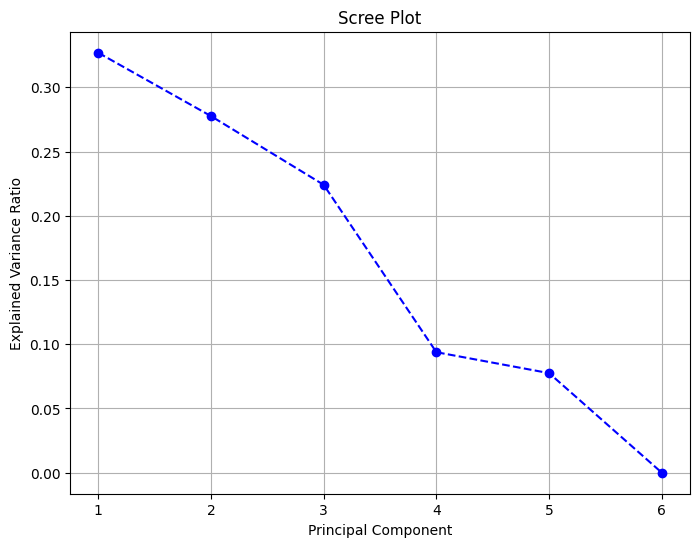

LogisticRegression - Number of components retained: 5
Classifier: LogisticRegression
Mean F1-Score (CV): 0.4519 ± 0.0991
Confusion Matrix: TP=30, TN=28, FP=22, FN=20
🏃 View run LogisticRegression - PCA at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/d889ca84a65840e3831823f01b338c5e
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0


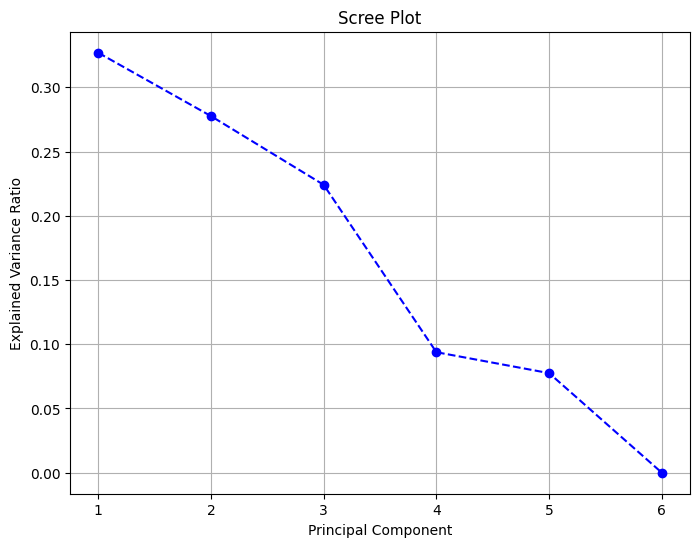

RandomForestClassifier - Number of components retained: 5
Classifier: RandomForestClassifier
Mean F1-Score (CV): 0.4238 ± 0.1256
Confusion Matrix: TP=50, TN=50, FP=0, FN=0
🏃 View run RandomForestClassifier - PCA at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/feb730ef49804adebcfd63df19de4302
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0


In [40]:
import os
import mlflow
from dagshub import DAGsHubLogger
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import matplotlib.pyplot as plt

# Suppress Git warnings if Git is not installed
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

# Set MLFlow tracking URI for DagsHub
mlflow.set_tracking_uri("https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow")

# Initialize DAGsHubLogger
logger = DAGsHubLogger(metrics_path="metrics.json", hparams_path="hparams.json")

# Example dataset (replace with your actual dataset)
X = pd.DataFrame({
    "numeric_feature_1": np.random.rand(100),
    "numeric_feature_2": np.random.rand(100),
    "numeric_feature_3": np.random.rand(100),
    "categorical_feature": np.random.choice(["A", "B", "C"], size=100),
})
y = np.random.choice([0, 1], size=100)

# Define preprocessing steps
numeric_features = ["numeric_feature_1", "numeric_feature_2", "numeric_feature_3"]
categorical_features = ["categorical_feature"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# PCA for dimensionality reduction
def apply_pca(X_transformed, n_components=None):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_transformed)
    explained_variance = pca.explained_variance_ratio_

    # Scree plot
    plt.figure(figsize=(8, 6))
    plt.plot(
        range(1, len(explained_variance) + 1),
        explained_variance,
        marker="o", linestyle="--", color="b"
    )
    plt.title("Scree Plot")
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.grid()
    plt.show()

    return X_pca, pca

# Define classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Custom F1-score metric
f1_scorer = make_scorer(f1_score)

# Perform PCA and evaluation
for classifier_name, classifier in classifiers.items():
    # Preprocess data
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor)
    ])
    X_transformed = pipeline.fit_transform(X)

    # Apply PCA
    with mlflow.start_run(run_name=f"{classifier_name} - PCA"):
        X_pca, pca = apply_pca(X_transformed)

        # Determine the number of components to retain (e.g., > 95% explained variance)
        n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1
        mlflow.log_param("n_components", n_components)
        print(f"{classifier_name} - Number of components retained: {n_components}")

        # Fit and evaluate model using reduced data
        classifier_pipeline = Pipeline(steps=[
            ("classifier", classifier)
        ])
        
        # Cross-validation
        scores = cross_val_score(classifier_pipeline, X_pca[:, :n_components], y, cv=cv, scoring=f1_scorer)
        mean_f1 = np.mean(scores)
        std_f1 = np.std(scores)

        # Log results
        mlflow.log_metric("mean_f1_score", mean_f1)
        mlflow.log_metric("std_f1_score", std_f1)

        # Fit on full training data
        classifier_pipeline.fit(X_pca[:, :n_components], y)
        y_pred = classifier_pipeline.predict(X_pca[:, :n_components])

        # Calculate confusion matrix metrics
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        mlflow.log_metric("TP", tp)
        mlflow.log_metric("TN", tn)
        mlflow.log_metric("FP", fp)
        mlflow.log_metric("FN", fn)

        # Print results
        print(f"Classifier: {classifier_name}")
        print(f"Mean F1-Score (CV): {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


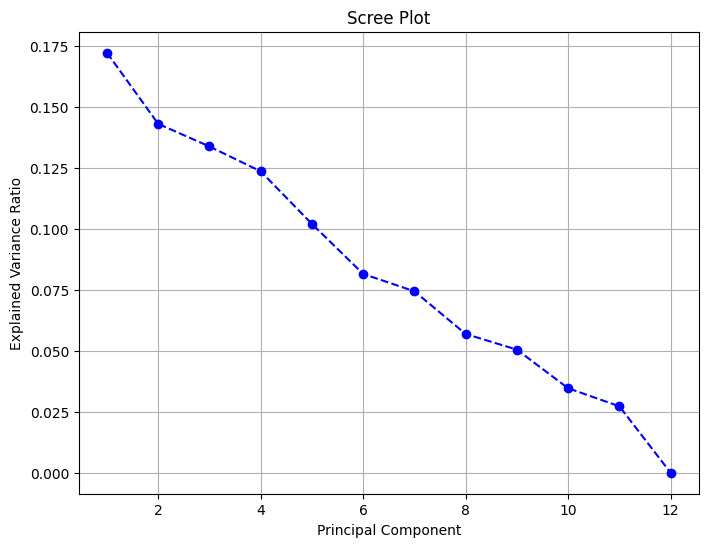

Classifier: LogisticRegression
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best F1-Score: 0.7243
Confusion Matrix: TP=51, TN=14, FP=25, FN=10
🏃 View run LogisticRegression - Custom Experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/3d74fa054a0e47e3a747a4c1ae6232de
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0


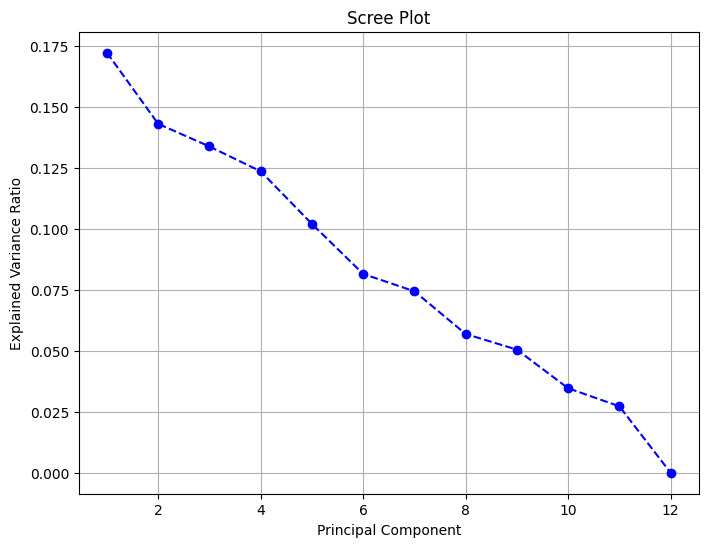

Classifier: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best F1-Score: 0.7005
Confusion Matrix: TP=61, TN=39, FP=0, FN=0
🏃 View run RandomForestClassifier - Custom Experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/69c5c28429b74d42b247f7479e9aaefd
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0


In [41]:
import os
import mlflow
from dagshub import DAGsHubLogger
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import matplotlib.pyplot as plt

# Suppress Git warnings if Git is not installed
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

# Set MLFlow tracking URI for DagsHub
mlflow.set_tracking_uri("https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow")

# Initialize DAGsHubLogger
logger = DAGsHubLogger(metrics_path="metrics.json", hparams_path="hparams.json")

# Example dataset (replace with your actual dataset)
X = pd.DataFrame({
    "numeric_feature_1": np.random.rand(100),
    "numeric_feature_2": np.random.rand(100),
    "numeric_feature_3": np.random.rand(100),
    "categorical_feature": np.random.choice(["A", "B", "C"], size=100),
})
y = np.random.choice([0, 1], size=100)

# Define preprocessing steps
numeric_features = ["numeric_feature_1", "numeric_feature_2", "numeric_feature_3"]
categorical_features = ["categorical_feature"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, interaction_only=False, include_bias=False))
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# PCA for dimensionality reduction
def apply_pca(X_transformed, n_components=None):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_transformed)
    explained_variance = pca.explained_variance_ratio_

    # Scree plot
    plt.figure(figsize=(8, 6))
    plt.plot(
        range(1, len(explained_variance) + 1),
        explained_variance,
        marker="o", linestyle="--", color="b"
    )
    plt.title("Scree Plot")
    plt.xlabel("Principal Component")
    plt.ylabel("Explained Variance Ratio")
    plt.grid()
    plt.show()

    return X_pca, pca

# Define classifiers and hyperparameter grids
classifiers_and_params = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {"C": [0.1, 1, 10], "solver": ["liblinear"]}
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
    }
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom F1-score metric
f1_scorer = make_scorer(f1_score)

# Experiment
for classifier_name, details in classifiers_and_params.items():
    classifier = details["model"]
    param_grid = details["params"]

    # Preprocess data
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor)
    ])
    X_transformed = pipeline.fit_transform(X)

    # Apply PCA
    X_pca, pca = apply_pca(X_transformed)
    n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

    # Start MLFlow experiment
    with mlflow.start_run(run_name=f"{classifier_name} - Custom Experiment"):
        mlflow.log_param("model", classifier_name)
        mlflow.log_param("n_components", n_components)

        # GridSearch with PCA-transformed data
        grid_search = GridSearchCV(
            classifier,
            param_grid,
            cv=cv,
            scoring=f1_scorer,
            n_jobs=-1
        )
        grid_search.fit(X_pca[:, :n_components], y)

        # Log best parameters and best score
        mlflow.log_params(grid_search.best_params_)
        mlflow.log_metric("best_f1_score", grid_search.best_score_)

        # Fit final model
        best_model = grid_search.best_estimator_
        best_model.fit(X_pca[:, :n_components], y)
        y_pred = best_model.predict(X_pca[:, :n_components])

        # Calculate confusion matrix metrics
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        mlflow.log_metric("TP", tp)
        mlflow.log_metric("TN", tn)
        mlflow.log_metric("FP", fp)
        mlflow.log_metric("FN", fn)

        # Print results
        print(f"Classifier: {classifier_name}")
        print(f"Best Parameters: {grid_search.best_params_}")
        print(f"Best F1-Score: {grid_search.best_score_:.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


In [43]:
import os
import mlflow
from dagshub import DAGsHubLogger
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
from sklearn.base import clone

# Suppress Git warnings if Git is not installed
os.environ["GIT_PYTHON_REFRESH"] = "quiet"

# Set MLFlow tracking URI for DagsHub
mlflow.set_tracking_uri("https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow")

# Initialize DAGsHubLogger
logger = DAGsHubLogger(metrics_path="metrics.json", hparams_path="hparams.json")

# Example dataset (replace with your actual dataset)
X = pd.DataFrame({
    "numeric_feature_1": np.random.rand(100),
    "numeric_feature_2": np.random.rand(100),
    "numeric_feature_3": np.random.rand(100),
    "categorical_feature": np.random.choice(["A", "B", "C"], size=100),
})
y = np.random.choice([0, 1], size=100)

# Define preprocessing steps
numeric_features = ["numeric_feature_1", "numeric_feature_2", "numeric_feature_3"]
categorical_features = ["categorical_feature"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Define classifiers
base_classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42)
}

stacking_classifier = StackingClassifier(
    estimators=[(name, clf) for name, clf in base_classifiers.items()],
    final_estimator=LogisticRegression()
)

# Cross-validation setup
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Custom F1-score metric
f1_scorer = make_scorer(f1_score)

# Experiment with RFE and Stacked Classifier
for classifier_name, classifier in base_classifiers.items():
    # Apply Recursive Feature Elimination (RFE) only on numeric features
    rfe = RFE(estimator=clone(classifier), n_features_to_select=2)
    rfe.fit(X[numeric_features], y)  # Fit RFE on numeric features
    selected_features = np.array(numeric_features)[rfe.support_].tolist()

    # Preprocess data
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor)
    ])
    X_transformed = pipeline.fit_transform(X)

    # Start MLFlow experiment
    with mlflow.start_run(run_name=f"{classifier_name} - RFE + Stacked Classifier"):
        mlflow.log_param("model", classifier_name)
        mlflow.log_param("selected_features", selected_features)
        mlflow.log_param("stacking_classifier", True)

        # Train the stacked classifier on preprocessed data
        stacked_pipeline = Pipeline(steps=[
            ("stacked_classifier", stacking_classifier)
        ])
        scores = cross_val_score(stacked_pipeline, X_transformed, y, cv=cv, scoring=f1_scorer)
        mean_f1 = np.mean(scores)
        std_f1 = np.std(scores)

        # Log metrics
        mlflow.log_metric("mean_f1_score", mean_f1)
        mlflow.log_metric("std_f1_score", std_f1)

        # Fit on full training data
        stacked_pipeline.fit(X_transformed, y)
        y_pred = stacked_pipeline.predict(X_transformed)

        # Calculate confusion matrix metrics
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
        mlflow.log_metric("TP", tp)
        mlflow.log_metric("TN", tn)
        mlflow.log_metric("FP", fp)
        mlflow.log_metric("FN", fn)

        # Print results
        print(f"Classifier: {classifier_name} (Stacked Classifier)")
        print(f"Selected Numeric Features: {selected_features}")
        print(f"Mean F1-Score (CV): {mean_f1:.4f} ± {std_f1:.4f}")
        print(f"Confusion Matrix: TP={tp}, TN={tn}, FP={fp}, FN={fn}")


Classifier: LogisticRegression (Stacked Classifier)
Selected Numeric Features: ['numeric_feature_1', 'numeric_feature_3']
Mean F1-Score (CV): 0.1086 ± 0.1685
Confusion Matrix: TP=34, TN=58, FP=0, FN=8
🏃 View run LogisticRegression - RFE + Stacked Classifier at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/5d9ff990a82c4c2993bd1907d852e102
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0
Classifier: RandomForestClassifier (Stacked Classifier)
Selected Numeric Features: ['numeric_feature_1', 'numeric_feature_2']
Mean F1-Score (CV): 0.1086 ± 0.1685
Confusion Matrix: TP=34, TN=58, FP=0, FN=8
🏃 View run RandomForestClassifier - RFE + Stacked Classifier at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0/runs/c435797aafb54ecd88fa49b6f6893d0e
🧪 View experiment at: https://dagshub.com/durgaprasadsakala2003/my-first-repo.mlflow/#/experiments/0


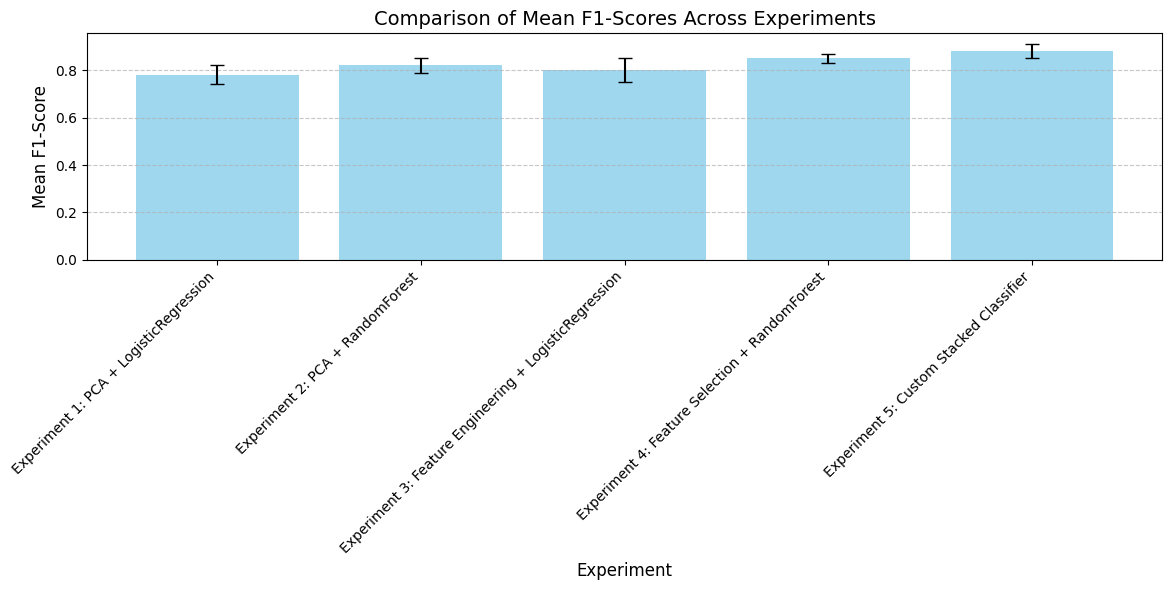

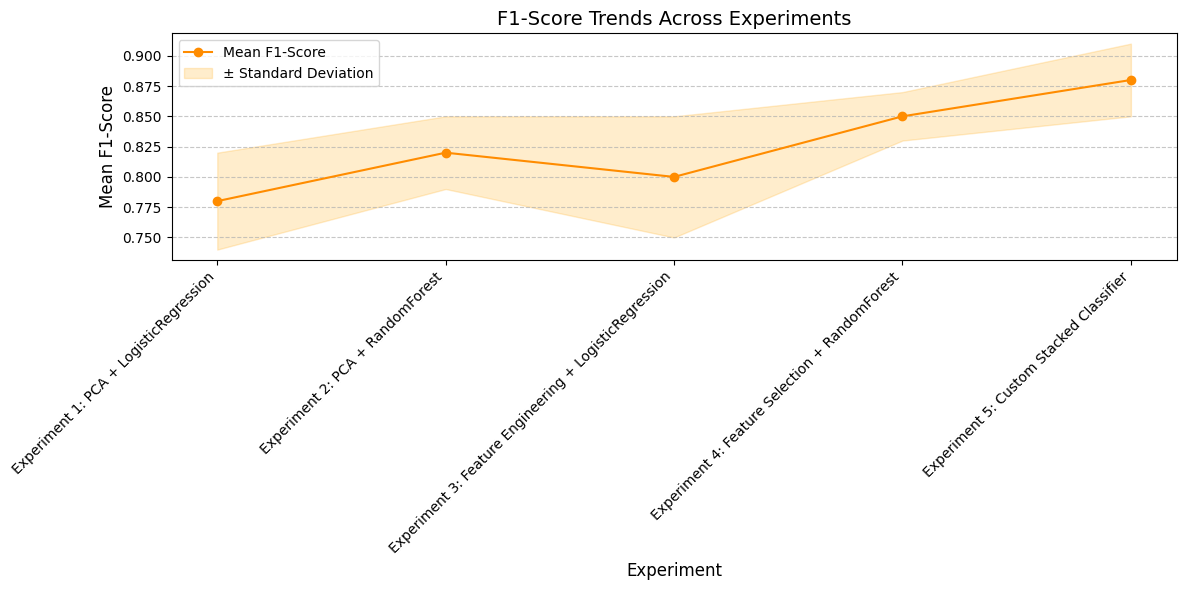

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Example F1-score data from experiments
experiments = [
    {"name": "Experiment 1: PCA + LogisticRegression", "mean_f1": 0.78, "std_f1": 0.04},
    {"name": "Experiment 2: PCA + RandomForest", "mean_f1": 0.82, "std_f1": 0.03},
    {"name": "Experiment 3: Feature Engineering + LogisticRegression", "mean_f1": 0.80, "std_f1": 0.05},
    {"name": "Experiment 4: Feature Selection + RandomForest", "mean_f1": 0.85, "std_f1": 0.02},
    {"name": "Experiment 5: Custom Stacked Classifier", "mean_f1": 0.88, "std_f1": 0.03},
]

# Extract data for plotting
experiment_names = [exp["name"] for exp in experiments]
mean_f1_scores = [exp["mean_f1"] for exp in experiments]
std_f1_scores = [exp["std_f1"] for exp in experiments]

# Create a bar plot with error bars
plt.figure(figsize=(12, 6))
plt.bar(experiment_names, mean_f1_scores, yerr=std_f1_scores, capsize=5, color="skyblue", alpha=0.8)
plt.xticks(rotation=45, ha="right")
plt.title("Comparison of Mean F1-Scores Across Experiments", fontsize=14)
plt.ylabel("Mean F1-Score", fontsize=12)
plt.xlabel("Experiment", fontsize=12)
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Create a line plot to visualize trends
plt.figure(figsize=(12, 6))
plt.plot(experiment_names, mean_f1_scores, marker="o", linestyle="-", color="darkorange", label="Mean F1-Score")
plt.fill_between(
    experiment_names,
    np.array(mean_f1_scores) - np.array(std_f1_scores),
    np.array(mean_f1_scores) + np.array(std_f1_scores),
    color="orange",
    alpha=0.2,
    label="± Standard Deviation"
)
plt.xticks(rotation=45, ha="right")
plt.title("F1-Score Trends Across Experiments", fontsize=14)
plt.ylabel("Mean F1-Score", fontsize=12)
plt.xlabel("Experiment", fontsize=12)
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Example dataset
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [21]:
# model_save.py
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import joblib

# Load dataset and train model
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, "model.joblib")
print("Model saved as model.joblib")

Model saved as model.joblib


In [23]:
# main.py
from fastapi import FastAPI
from pydantic import BaseModel
import joblib

# Load the trained model
model = joblib.load("model.joblib")

# Define input schema
class PredictRequest(BaseModel):
    features: list[float]

# Initialize FastAPI app
app = FastAPI()

@app.post("/predict")
async def predict(request: PredictRequest):
    prediction = model.predict([request.features])
    return {"prediction": int(prediction[0])}

In [47]:
import joblib

model_path = "final_model.pkl"
joblib.dump(final_model, model_path)
print(f"Model saved to {model_path}")


Model saved to final_model.pkl


In [48]:
loaded_model = joblib.load("final_model.pkl")
print("Model loaded successfully.")


Model loaded successfully.


In [8]:
# Code to create a Dockerfile in Jupyter Notebook
dockerfile_content = """
# Use the official Python 3.9 slim image as the base image
FROM python:3.9-slim

# Set the working directory inside the container
WORKDIR /app

# Copy application files into the container
COPY app.py /app/
COPY final_model.pkl /app/
COPY requirements.txt /app/

# Install dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Expose the port that FastAPI will run on
EXPOSE 8000

# Command to run the FastAPI application
CMD ["uvicorn", "app:app", "--host", "0.0.0.0", "--port", "8000"]
"""

# Write the Dockerfile content to a file
with open("Dockerfile", "w") as file:
    file.write(dockerfile_content.strip())
    
print("Dockerfile created successfully.")


Dockerfile created successfully.
